## Logistic Regression ( Loan eligibility Prediction )

### Data Preprocessing Steps

In [1]:
# Importing all the libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the train file and test file 

df_train = pd.read_csv("loan-train.csv")
df_test = pd.read_csv("loan-test.csv")

In [3]:
print("Shape of Training set : ", df_train.shape)
print("Shape of Training set : ", df_train.shape)

Shape of Training set :  (614, 13)
Shape of Training set :  (614, 13)


In [4]:
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
#Droping the Loan ID from training and testing dataset

df_train = df_train.drop('Loan_ID', axis=1)
df_test = df_test.drop('Loan_ID', axis=1)

In [7]:
#Counting the number of 'Loan_Amount_Term' 

df_train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [8]:
#Keeping only the dataset of 'Loan_Amount_Term' == 360.0 in training and testing because they are the maximum in the dataset

df_train = df_train[df_train['Loan_Amount_Term'] == 360.0]
df_train = df_train[df_train['Loan_Amount_Term'] == 360.0]

In [9]:
#Droping the 'Loan_Amount_Term' column because they are unique

df_train = df_train.drop('Loan_Amount_Term', axis=1)
df_test = df_test.drop('Loan_Amount_Term', axis=1)

In [10]:
#Counting the number of 'Property_Area' 

df_train.Property_Area.value_counts()

Semiurban    200
Rural        156
Urban        156
Name: Property_Area, dtype: int64

In [11]:
#Counting the number of 'Self_Employed' 

df_train.Self_Employed.value_counts()

No     418
Yes     67
Name: Self_Employed, dtype: int64

In [12]:
# To check the missing values in training dataset

df_train.isnull().sum()

Gender               11
Married               1
Dependents           10
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#df_train['Married'] = df_train['Married'].replace(np.nan,'Yes')
#df_train['Dependents'] = df_train['Dependents'].replace(np.nan,'0')
#df_train['Self_Employed'] = df_train['Self_Employed'].replace(np.nan,'No')
#df_train['Gender'] = df_train['Gender'].replace(np.nan,'Male')

#df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].median())
#df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median())
#df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].median())

In [14]:
# To check the missing values in testing dataset

df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Credit_History       29
Property_Area         0
dtype: int64

In [15]:
#df_test['Dependents'] = df_test['Dependents'].replace(np.nan,'0')
#df_test['Self_Employed'] = df_test['Self_Employed'].replace(np.nan,'No')
#df_test['Gender'] = df_test['Gender'].replace(np.nan,'Male')

#df_test['LoanAmount'] = df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())
#df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median())
#df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].median())

In [16]:
#Droping the missing values from the datasets

df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [17]:
#Importing preprocessing for Label encoder

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [18]:
#Converting classification columns into numerical columns

df_train['Gender']= label_encoder.fit_transform(df_train['Gender'])
df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])

In [19]:
df_train['Dependents']= label_encoder.fit_transform(df_train['Dependents'])
df_test['Dependents']= label_encoder.fit_transform(df_test['Dependents'])

In [20]:
df_train['Married']= label_encoder.fit_transform(df_train['Married'])
df_test['Married']= label_encoder.fit_transform(df_test['Married'])

In [21]:
df_train['Education']= label_encoder.fit_transform(df_train['Education'])
df_test['Education']= label_encoder.fit_transform(df_test['Education'])

In [22]:
df_train['Self_Employed']= label_encoder.fit_transform(df_train['Self_Employed'])
df_test['Self_Employed']= label_encoder.fit_transform(df_test['Self_Employed'])

In [23]:
df_train['Property_Area']= label_encoder.fit_transform(df_train['Property_Area'])
df_test['Property_Area']= label_encoder.fit_transform(df_test['Property_Area'])

In [24]:
df_train['Loan_Status']= label_encoder.fit_transform(df_train['Loan_Status'])

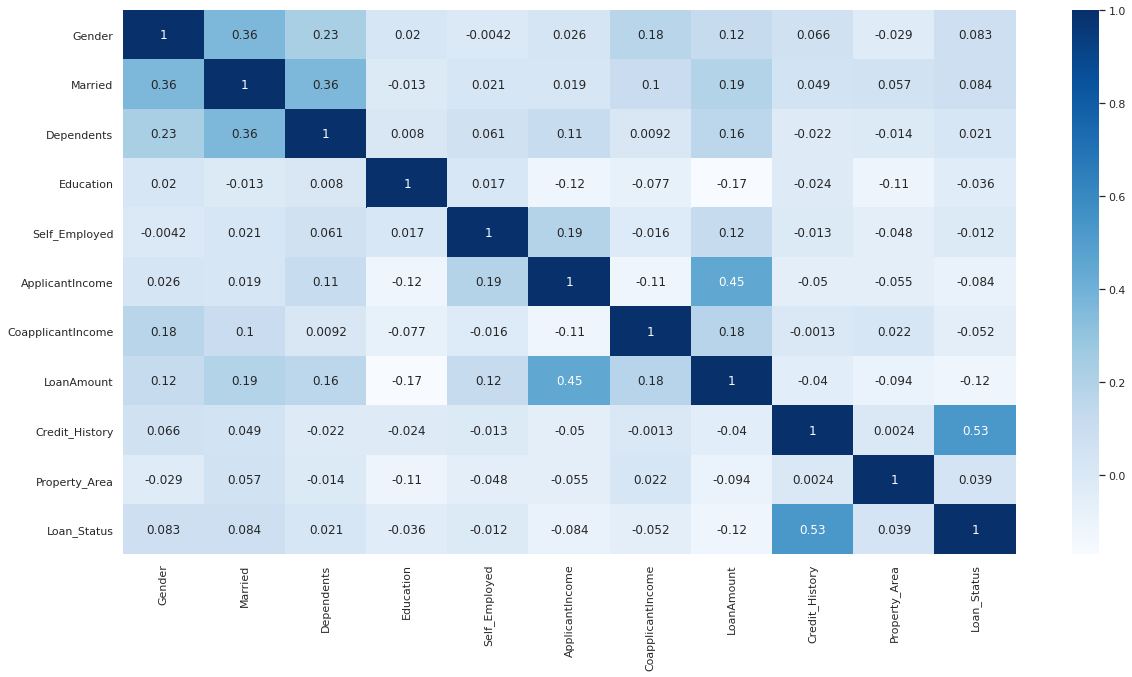

In [25]:
#checking the correlation through boxPlot

sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap='Blues')
plt.show()

### Fitting our LR model to the Training set -

In [26]:
# Here, we are disturbing our data as X and Y i.e.,(Training and Testing Data)

X = df_train.drop(['Loan_Status'], axis =1)
y = df_train['Loan_Status']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 142)

In [28]:
#Implementing StandardScaler to transform the data such that its distribution will have a mean value 0 and standard deviation of 1.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [29]:
#Implementing PCA to to reduce the dimensions of the dataset.

from sklearn.decomposition import PCA

pca = PCA(n_components=0.99) 
X_train_new = pca.fit_transform(X_train) 
X_test_new = pca.fit_transform(X_test) 

In [30]:
#Implementing Logistic Regression Model

from sklearn.linear_model import LogisticRegression

prediction = LogisticRegression()

In [31]:
# Fitting into the model

prediction.fit(X_train_new, y_train)

LogisticRegression()

In [32]:
#Train Score

prediction.score(X_train_new, y_train)

0.8455284552845529

In [33]:
#Test Score

prediction.score(X_test_new, y_test)

0.703030303030303